In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
from matplotlib_venn import venn2

In [24]:
#Importing the dataset of sanctioned firms
sanctioned_firms = pd.read_csv("C:/Users/lisa/OneDrive - Nexus365/Thesis Data/final/final/sanctioned_firms_5.csv")

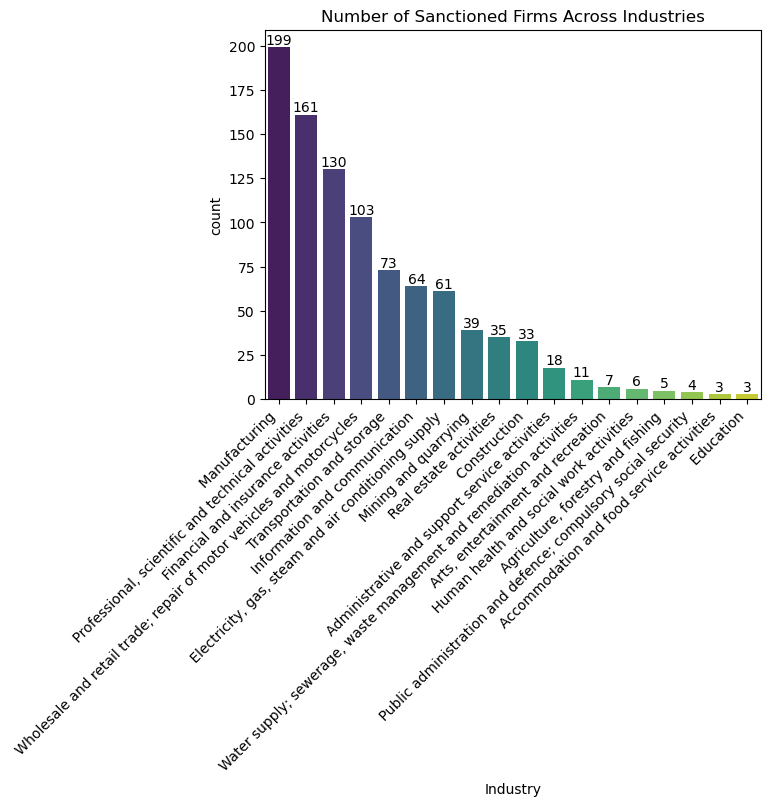

In [25]:
#Plotting the number of sanctioned firms across industries 
ax = sns.countplot(x="NACE2_MAIN_SECTION", order=sanctioned_firms["NACE2_MAIN_SECTION"].value_counts().index, data=sanctioned_firms,palette="viridis")
ax.bar_label(ax.containers[0])
plt.title("Number of Sanctioned Firms Across Industries")
ax.set_xlabel("Industry")
current_labels = [label.get_text() for label in ax.get_xticklabels()]
modified_labels = [label[3:] for label in current_labels]
ax.set_xticklabels(modified_labels, rotation=45, ha="right")

plt.show()

In [26]:
#Creating a table showing the number and percentage of sanctioned firms across industries
table = sanctioned_firms.stb.freq(["NACE2_MAIN_SECTION"])[["NACE2_MAIN_SECTION", "count", "percent"]]
table['NACE2_MAIN_SECTION'] = table['NACE2_MAIN_SECTION'].str[3:]
table.columns = ["Industry", "Count", "Percent"]
table.index = range(1, len(table) + 1)
styled_table = (
    table.style
    .format({'Percent': '{:.2f}'})
    .background_gradient(cmap='YlGnBu', subset=['Percent', 'Count'])
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'left')]}, 
        {'selector': 'td', 'props': [('text-align', 'left'), ('border', '1px solid #ddd')]}
    ])
)
styled_table

,Industry,Count,Percent
1,Manufacturing,199,20.84
2,"Professional, scientific and technical activities",161,16.86
3,Financial and insurance activities,130,13.61
4,Wholesale and retail trade; repair of motor vehicles and motorcycles,103,10.79
5,Transportation and storage,73,7.64
6,Information and communication,64,6.70
7,"Electricity, gas, steam and air conditioning supply",61,6.39
8,Mining and quarrying,39,4.08
9,Real estate activities,35,3.66
10,Construction,33,3.46


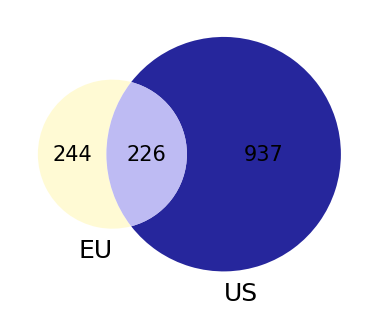

In [27]:
#Creating a Venn diagram showing sanctioned firms by sanctioning government
eu_count = sanctioned_firms['EU_SANCTION'].sum()
us_count = sanctioned_firms['US_SANCTION'].sum()
overlap_count = ((sanctioned_firms['EU_SANCTION'] == 1) & (sanctioned_firms['US_SANCTION'] == 1)).sum()

venn_labels = {'100': f'EU: {eu_count}', '010': f'US: {us_count}', '110': f'Both: {overlap_count}'}

fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
venn2(subsets=(eu_count, us_count, overlap_count), set_labels=('EU', 'US'), set_colors=('lemonchiffon', 'darkblue'), alpha=0.85)

plt.show()

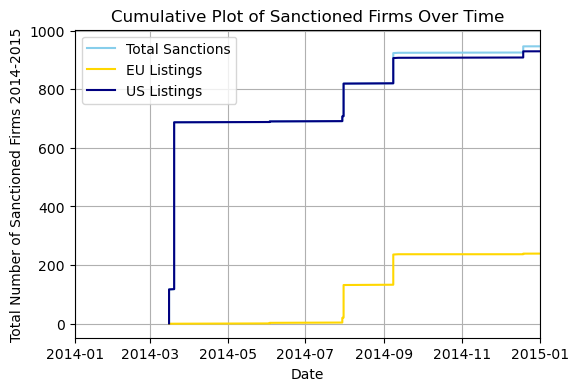

In [28]:
#Creating a cumulative plot of the number of sanctioned firms over time
sanctioned_firms["DATE_OF_LISTING_EU"] = pd.to_datetime(sanctioned_firms["DATE_OF_LISTING_EU"], format="%d/%m/%Y")
sanctioned_firms["DATE_OF_LISTING_US"] = pd.to_datetime(sanctioned_firms["DATE_OF_LISTING_US"], format="%d/%m/%Y")

sanctioned_firms["COMBINED_DATE"] = sanctioned_firms[['DATE_OF_LISTING_EU', 'DATE_OF_LISTING_US']].max(axis=1)
sanctioned_firms.sort_values(by="COMBINED_DATE", inplace=True)

cumulative_sum_total = range(1, len(sanctioned_firms) + 1)
cumulative_sum_eu = sanctioned_firms["DATE_OF_LISTING_EU"].notnull().cumsum()
cumulative_sum_us = sanctioned_firms["DATE_OF_LISTING_US"].notnull().cumsum()

plt.figure(figsize=(6, 4))
plt.plot(sanctioned_firms["COMBINED_DATE"], cumulative_sum_total, linestyle='-', color='skyblue', label='Total Sanctions')
plt.plot(sanctioned_firms["COMBINED_DATE"], cumulative_sum_eu, linestyle='-', color='gold', label='EU Listings')
plt.plot(sanctioned_firms["COMBINED_DATE"], cumulative_sum_us, linestyle='-', color='navy', label='US Listings')

plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2015-01-01'))

plt.title('Cumulative Plot of Sanctioned Firms Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Sanctioned Firms 2014-2015')
plt.grid(True)

plt.legend()

plt.show()

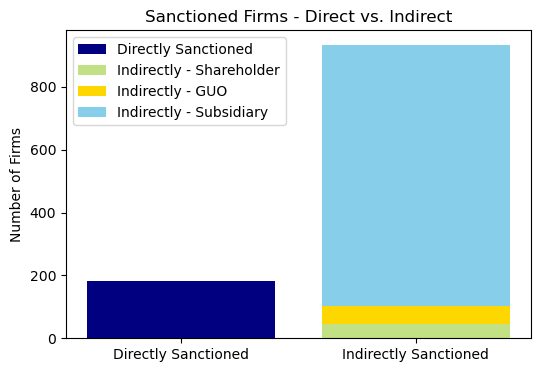

In [29]:
#Creating a barplot visualising the different types of being sanctioned
direct_count = sanctioned_firms['DIRECTLY_SANCTIONED'].sum()
indirect_counts = sanctioned_firms[['SHAREHOLDER_SANCTIONED', 'GUO_SANCTIONED', 'SANCTIONED_AS_SUBSIDIARY']].sum()

fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(0, direct_count, color='navy', label='Directly Sanctioned')

ax.bar(1, indirect_counts['SHAREHOLDER_SANCTIONED'], color='yellowgreen', label='Indirectly - Shareholder', alpha=0.6)
ax.bar(1, indirect_counts['GUO_SANCTIONED'], bottom=indirect_counts['SHAREHOLDER_SANCTIONED'], color='gold', label='Indirectly - GUO')
ax.bar(1, indirect_counts['SANCTIONED_AS_SUBSIDIARY'], bottom=indirect_counts['SHAREHOLDER_SANCTIONED'] + indirect_counts['GUO_SANCTIONED'], color='skyblue', label='Indirectly - Subsidiary')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Directly Sanctioned', 'Indirectly Sanctioned'])
ax.set_ylabel('Number of Firms')
ax.set_title('Sanctioned Firms - Direct vs. Indirect')

ax.legend()

plt.show()